In [9]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path

# Import custom modules
from src.data_loader import DataLoader
from config import *

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

print("Libraries imported successfully!")


Libraries imported successfully!


In [10]:
# Load all data
loader = DataLoader()
loader.load_all_data()

# Get basic info
loader.get_basic_info()


Loading data files...


Training data: 100820 rows
Test data: 44726 rows
Games data: 72773 rows
Turns data: 2005498 rows
DATASET INFORMATION

Train DataFrame:
  Shape: (100820, 4)
  Columns: ['game_id', 'nickname', 'score', 'rating']
  Missing values: 0

  First few rows:
   game_id   nickname  score  rating
0        1  BetterBot    335    1637
1        1      stevy    429    1500
2        3  davidavid    440    1811

Test DataFrame:
  Shape: (44726, 4)
  Columns: ['game_id', 'nickname', 'score', 'rating']
  Missing values: 22363

  First few rows:
   game_id   nickname  score  rating
0        2      Super    488     NaN
1        2  BetterBot    401  2000.0
2        7    STEEBot    377  2082.0

Games DataFrame:
  Shape: (72773, 12)
  Columns: ['game_id', 'first', 'time_control_name', 'game_end_reason', 'winner', 'created_at', 'lexicon', 'initial_time_seconds', 'increment_seconds', 'rating_mode', 'max_overtime_minutes', 'game_duration_seconds']
  Missing values: 0

  First few rows:
   game_id      first time_

In [11]:
# Check for missing values in each dataset
datasets = {
    'train': loader.train_df,
    'test': loader.test_df,
    'games': loader.games_df
}

for name, df in datasets.items():
    print(f"\n{name.upper()} Missing Values:")
    missing = df.isnull().sum()
    print(missing[missing > 0] if missing.sum() > 0 else "No missing values")



TRAIN Missing Values:
No missing values

TEST Missing Values:
rating    22363
dtype: int64

GAMES Missing Values:
No missing values


In [12]:
# Training data statistics
print("TRAIN DATA SUMMARY")
print("=" * 60)
print(loader.train_df.describe())
print("\n")

# Test data statistics (for known values)
print("TEST DATA SUMMARY (known values)")
print("=" * 60)
print(loader.test_df.describe())
print("\n")

# Games data statistics
print("GAMES DATA SUMMARY")
print("=" * 60)
print(loader.games_df.describe())


TRAIN DATA SUMMARY
             game_id          score         rating
count  100820.000000  100820.000000  100820.000000
mean    36367.328605     399.029022    1875.592938
std     21020.288705      75.184778     231.791016
min         1.000000     -64.000000    1033.000000
25%     18139.000000     352.000000    1664.000000
50%     36339.500000     398.000000    1907.000000
75%     54625.000000     445.000000    2060.000000
max     72773.000000    1132.000000    2510.000000


TEST DATA SUMMARY (known values)
            game_id         score        rating
count  44726.000000  44726.000000  22363.000000
mean   36431.342664    401.016791   2002.547780
std    20979.878622     79.889084    163.343333
min        2.000000      0.000000   1407.000000
25%    18347.500000    352.000000   1891.000000
50%    36474.000000    401.000000   2006.000000
75%    54477.750000    450.000000   2127.000000
max    72769.000000   1171.000000   2377.000000


GAMES DATA SUMMARY
            game_id        winner 

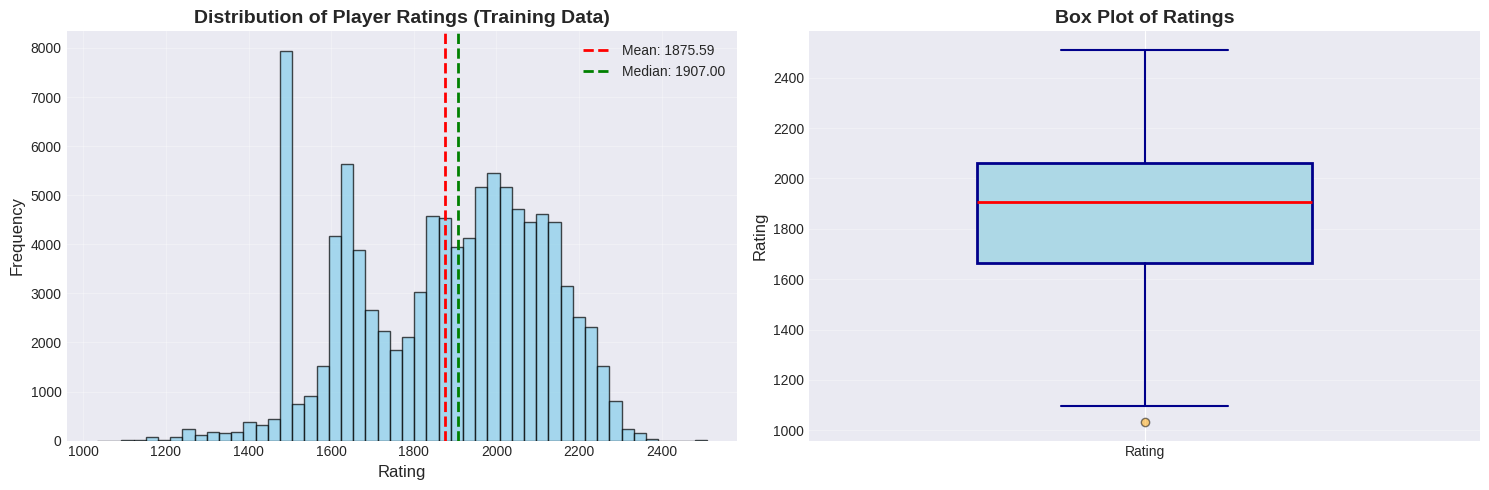

Rating Statistics:
  Mean: 1875.59
  Median: 1907.00
  Std: 231.79
  Min: 1033.00
  Max: 2510.00


In [13]:
# Distribution of ratings
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
train_df = loader.train_df
axes[0].hist(train_df['rating'], bins=50, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].set_title('Distribution of Player Ratings (Training Data)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Rating', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(train_df['rating'].mean(), color='r', linestyle='--', linewidth=2, label=f'Mean: {train_df["rating"].mean():.2f}')
axes[0].axvline(train_df['rating'].median(), color='g', linestyle='--', linewidth=2, label=f'Median: {train_df["rating"].median():.2f}')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Box plot with better visibility
bp = axes[1].boxplot([train_df['rating']], 
                      patch_artist=True,  # Enable filling
                      widths=0.5,
                      boxprops=dict(facecolor='lightblue', color='darkblue', linewidth=2),
                      medianprops=dict(color='red', linewidth=2),
                      whiskerprops=dict(color='darkblue', linewidth=1.5),
                      capprops=dict(color='darkblue', linewidth=1.5),
                      flierprops=dict(marker='o', markerfacecolor='orange', markersize=6, alpha=0.5))
axes[1].set_title('Box Plot of Ratings', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Rating', fontsize=12)
axes[1].set_xticklabels(['Rating'])
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print(f"Rating Statistics:")
print(f"  Mean: {train_df['rating'].mean():.2f}")
print(f"  Median: {train_df['rating'].median():.2f}")
print(f"  Std: {train_df['rating'].std():.2f}")
print(f"  Min: {train_df['rating'].min():.2f}")
print(f"  Max: {train_df['rating'].max():.2f}")


BOT RATINGS:
             count         mean         std     min     25%     50%     75%  \
nickname                                                                      
BetterBot  16602.0  1886.133357  136.688618  1349.0  1747.0  1937.0  1994.0   
HastyBot   17346.0  1958.006053  267.123414  1604.0  1640.0  2025.0  2215.0   
STEEBot    16462.0  2039.239157  131.126281  1652.0  1891.0  2096.0  2138.0   

              max  
nickname           
BetterBot  2148.0  
HastyBot   2377.0  
STEEBot    2275.0  


/tmp/ipykernel_130373/355295650.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(bot_ratings,


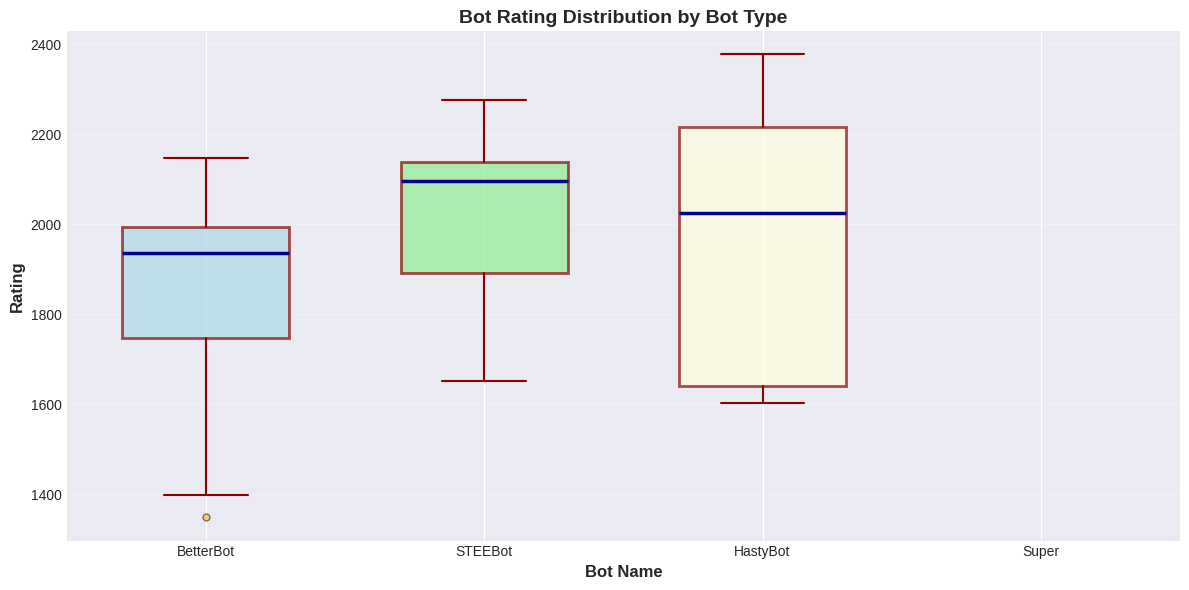

In [14]:
# Identify bots
bots = ['BetterBot', 'STEEBot', 'HastyBot', 'Super']

# Get bot ratings
bot_data = train_df[train_df['nickname'].isin(bots)]
print("BOT RATINGS:")
print("=" * 60)
bot_stats = bot_data.groupby('nickname')['rating'].describe()
print(bot_stats)

# Visualization with better visibility
fig, ax = plt.subplots(figsize=(12, 6))

# Prepare data for each bot
bot_ratings = [bot_data[bot_data['nickname'] == bot]['rating'].values for bot in bots]

# Create box plot with custom styling
bp = ax.boxplot(bot_ratings, 
                labels=bots,
                patch_artist=True,  # Enable filling
                widths=0.6,
                boxprops=dict(facecolor='lightcoral', color='darkred', linewidth=2, alpha=0.7),
                medianprops=dict(color='darkblue', linewidth=2.5),
                whiskerprops=dict(color='darkred', linewidth=1.5),
                capprops=dict(color='darkred', linewidth=1.5),
                flierprops=dict(marker='o', markerfacecolor='orange', markersize=5, alpha=0.5))

# Color each box differently
colors = ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax.set_title('Bot Rating Distribution by Bot Type', fontsize=14, fontweight='bold')
ax.set_xlabel('Bot Name', fontsize=12, fontweight='bold')
ax.set_ylabel('Rating', fontsize=12, fontweight='bold')
ax.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()
